<div align="right"><b> Index No : 200462U </b></div>

<div align="right"><b> Name : Randika Perera </b></div>

# Question 1: Intensity Transformation

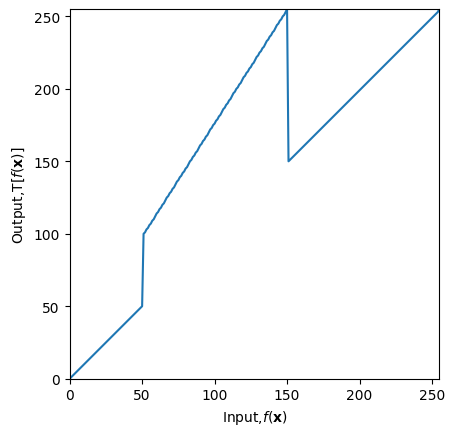

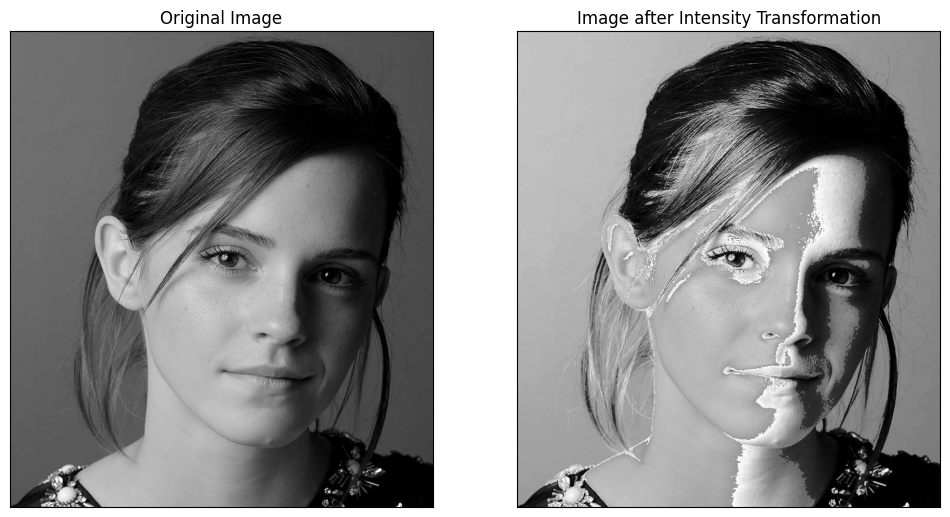

In [65]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


t1 = np.linspace(0,50,50-0+1).astype('uint8')
#print(len(t1))
#print(t1)
#print()

t2 = np.linspace(100,255,150-50).astype('uint8')
#print(len(t2))
#print(t2)
#print()

t3 = np.linspace(150,255,255-150).astype('uint8')
#print(len(t3))
#print(t3)
#print()

transform = np.concatenate((t1,t2),axis=0).astype('uint8')
transform = np.concatenate((transform,t3),axis=0).astype('uint8')
#print(len(transform))
#print(transform)
#print()

fig,ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input,$f(\mathbf{x})$')
ax.set_ylabel('Output,$\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform_intensity_windowing.png')
plt.show()

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(12,12))

img_orig = cv.imread('emma.jpg',cv.IMREAD_GRAYSCALE)
axes[0].imshow(img_orig, cmap='gray')
axes[0].set_title('Original Image')
axes[0].set_xticks([]), axes[0].set_yticks([])

image_transformed = cv.LUT(img_orig, transform)
axes[1].imshow(image_transformed, cmap='gray')
axes[1].set_title('Image after Intensity Transformation')
axes[1].set_xticks([]), axes[1].set_yticks([])

plt.show()

# Question 2: Intensity Transformation

## Extracting White Matter & Gray Matter and Visualizing them in their True Intensity

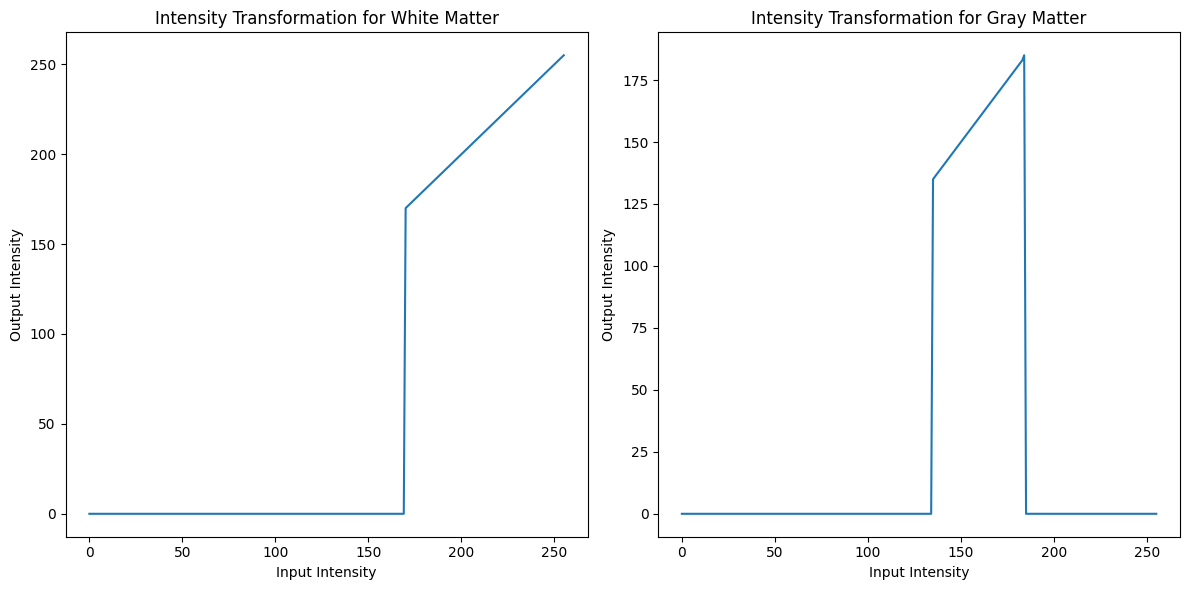

Displaying the extracted white matter and gray matter in their true intensities


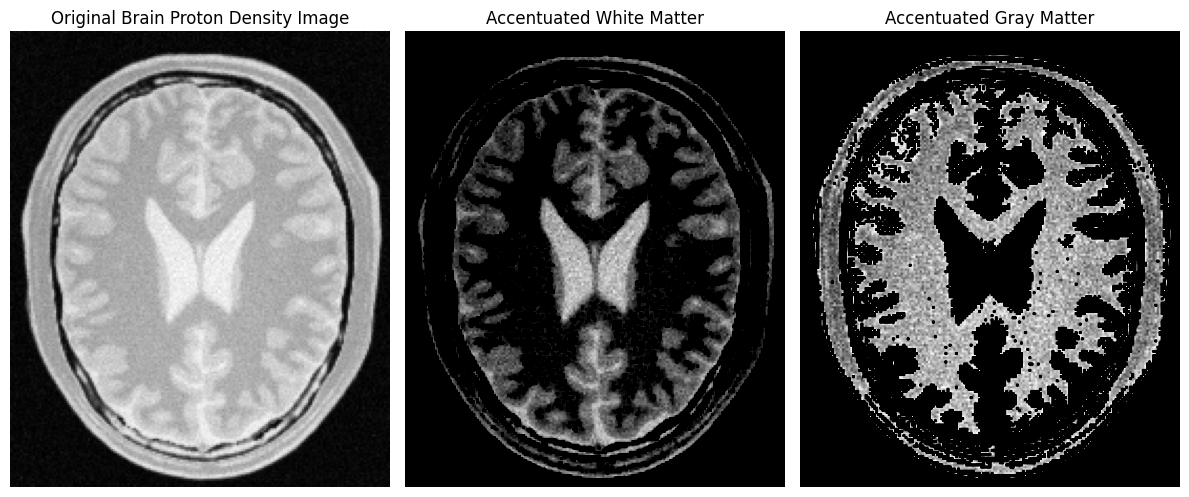

In [66]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_brain = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)

t_white_threshold = 170
t_white_matter = np.linspace(0, 255, 256, dtype='uint8')
t_white_matter[:t_white_threshold] = 0
t_white_matter[t_white_threshold:] = np.linspace(t_white_threshold, 255, 255-t_white_threshold+1, dtype='uint8')
#print("Length of t_white_matter Transformation Array :",len(t_white_matter))
#print(t_white_matter)
#print()

t_grey_threshold_lower = 135
t_grey_threshold_upper = 185
t_gray_matter = np.linspace(0, 255, 256, dtype='uint8')
t_gray_matter[:t_grey_threshold_lower] = 0
t_gray_matter[t_grey_threshold_upper:] = 0
t_gray_matter[t_grey_threshold_lower:t_grey_threshold_upper] = np.linspace(t_grey_threshold_lower, t_grey_threshold_upper, t_grey_threshold_upper-t_grey_threshold_lower, dtype='uint8')
#print("Length of t_gray_matter Transformation Array :",len(t_gray_matter))
#print(t_gray_matter)
#print()


image_gray_matter  = cv.LUT(img_brain, t_gray_matter)
image_white_matter = cv.LUT(img_brain, t_white_matter)




plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(t_white_matter)
plt.title('Intensity Transformation for White Matter')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')

plt.subplot(122)
plt.plot(t_gray_matter)
plt.title('Intensity Transformation for Gray Matter')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')

plt.tight_layout()
plt.show()


print("Displaying the extracted white matter and gray matter in their true intensities")


plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(img_brain, cmap='gray')
plt.title('Original Brain Proton Density Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(image_white_matter, cmap='gray', vmin=t_white_threshold, vmax=255)  
plt.title('Accentuated White Matter')
plt.axis('off')

plt.subplot(133)
plt.imshow(image_gray_matter, cmap='gray', vmin=t_grey_threshold_lower, vmax=t_grey_threshold_upper)  
plt.title('Accentuated Gray Matter')
plt.axis('off')

plt.tight_layout()
plt.show()







The threshold values for cutting out white matter and gray matter were selected the through trial and error. The values were selected such that the white matter and gray matter were clearly visible. The values selected are as follows,

- *White Matter* : Lower=170, Upper=255

- *Gray Matter* : Lower=135, Upper=185

## Visualizing the Previously Extracted Gray Matter and White Matter as Black and White Images

Now the interested portion of the image will be displayed in black and everything else will be displayed in white.


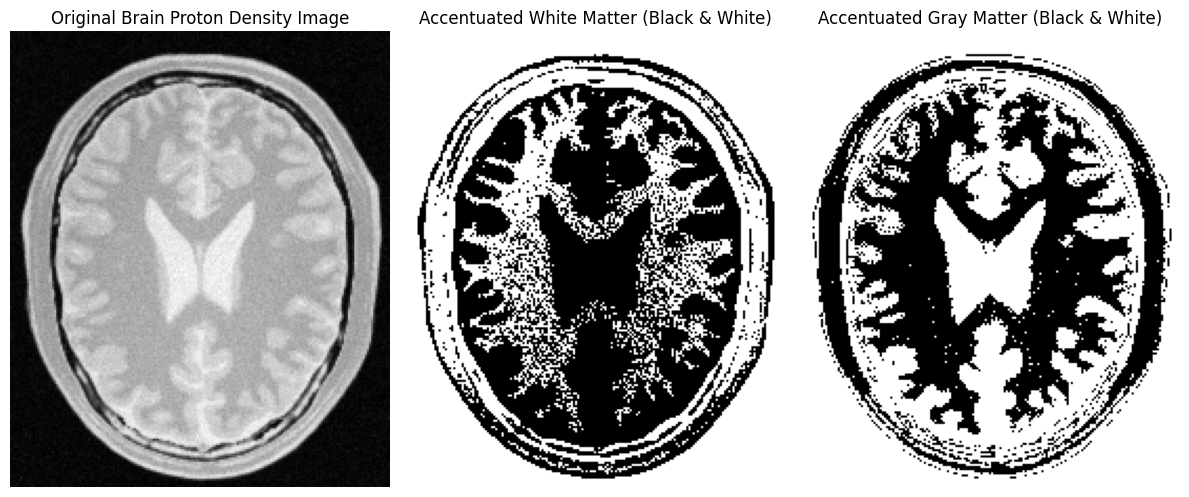

In [67]:
print("Now the interested portion of the image will be displayed in black and everything else will be displayed in white.")

bw_image_white_matter = cv.threshold(image_white_matter, 1, 255, cv.THRESH_BINARY_INV)[1]   # Inverted threshold
bw_image_gray_matter = cv.threshold(image_gray_matter, 1, 255, cv.THRESH_BINARY_INV)[1]     # Inverted threshold

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(img_brain, cmap='gray')
plt.title('Original Brain Proton Density Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(bw_image_white_matter, cmap='gray')  
plt.title('Accentuated White Matter (Black & White)')
plt.axis('off')

plt.subplot(133)
plt.imshow(bw_image_gray_matter, cmap='gray')  
plt.title('Accentuated Gray Matter (Black & White)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Question 3: Gamma Correction

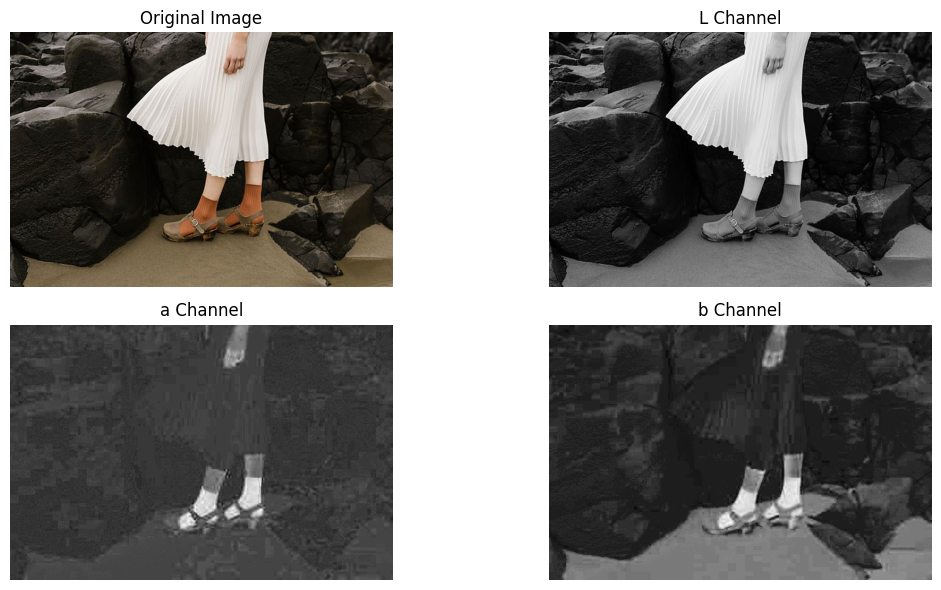

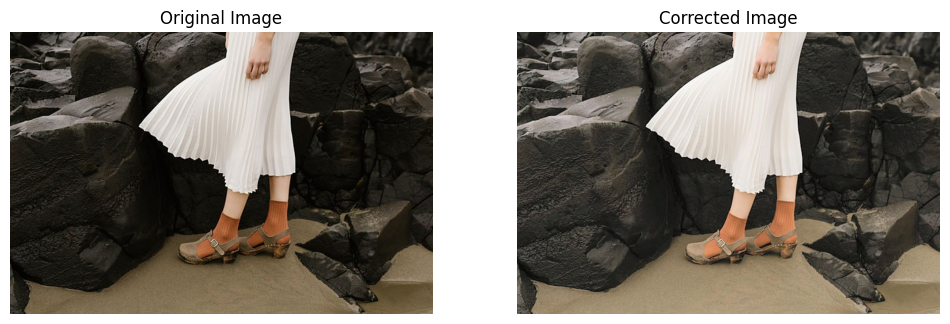

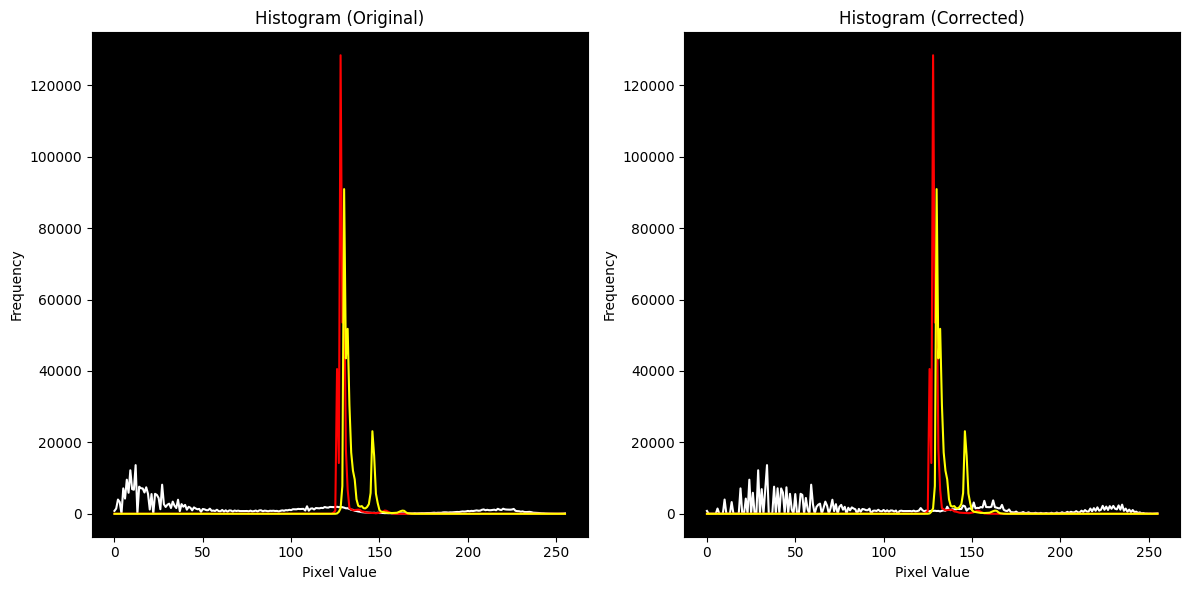

In [68]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

image = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)       # Open CV will read image in BGR format

image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)        # Convert BGR to RGB if we need to display using matplotlib

image_lab = cv.cvtColor(image, cv.COLOR_BGR2LAB)        # Convert BGR to LAB format as mentioned in the question
l_channel, a_channel, b_channel = cv.split(image_lab)   # Split the LAB image into its channels


plt.figure(figsize=(12, 6))
plt.subplot(221)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(222)
plt.imshow(l_channel, cmap='gray')
plt.title('L Channel')
plt.axis('off')
plt.subplot(223)
plt.imshow(a_channel, cmap='gray')
plt.title('a Channel')
plt.axis('off')
plt.subplot(224)
plt.imshow(b_channel, cmap='gray')
plt.title('b Channel')
plt.axis('off')
plt.tight_layout()


gamma = 0.65
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0, 256)]).astype('uint8') 
l_channel_corrected = cv.LUT(l_channel, table)                                 # Apply gamma correction to the L plane using the lookup table
image_lab_corrected = cv.merge((l_channel_corrected, a_channel, b_channel))    # Merge the corrected L channel with the A and B channels

image_corrected = cv.cvtColor(image_lab_corrected, cv.COLOR_LAB2RGB)           # Convert LAB to RGB for displaying using matplotlib


plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(image_corrected)
plt.title('Corrected Image')
plt.axis('off')




f, axarr = plt.subplots(1, 2, figsize=(12, 6))
space = ('l', 'a', 'b')                  #3 channels in LAB space
colour = ('white', 'red', 'yellow')      #3 colours that will be used to plot the histograms
# White for L channel, Red for A channel and Yellow for B channel

for i, s in enumerate(space):            
# i will get values 0,1,2 and s will get values l,a,b.

    hist_orig = cv.calcHist([image_lab], [i], None, [256], [0, 256])             # Calculate histogram from original LAB image
    axarr[0].plot(hist_orig, color=colour[i])

    hist_gamma = cv.calcHist([image_lab_corrected], [i], None, [256], [0, 256])  # Calculate histogram from corrected LAB image
    axarr[1].plot(hist_gamma, color=colour[i])

axarr[0].set_facecolor('black')
axarr[0].set_title('Histogram (Original)')
axarr[0].set_xlabel('Pixel Value')
axarr[0].set_ylabel('Frequency')

axarr[1].set_facecolor('black')
axarr[1].set_title('Histogram (Corrected)')
axarr[1].set_xlabel('Pixel Value')
axarr[1].set_ylabel('Frequency')

plt.tight_layout()

plt.show()


- After trying gamma correction for several values of gamma, **0.65** was selected as the best value.
- Note that we applied gamma correction only to the L channel. 
- So only the histogram of L channel (white graph above) has changed. 
- The histograms of the other two channels remain the same.

# Question 4: Increasing Vibrance using the given intensity transformation

## Using an Interactive Slider to Change a and view the results in real time

In [1]:
%matplotlib inline
from ipywidgets import interactive, FloatSlider, Output
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


def vibrance(x,a):
    return int(min(x+a*128*np.exp(-(x-128)**2/(2*70**2)),255))


# The keyword int will be used for variables in this codeblock. 
# This is done to avoid to duplication of variable names from other codeblocks.

def spider_update_image(a):
    plt.clf()
    table = np.array([vibrance(x,a) for x in np.arange(0, 256)]).astype('uint8')
    int_s_channel_corrected = cv.LUT(int_s_channel, table)                                                 # Apply vibrance correction to the S plane using the lookup table
    int_spider_image_hsv_corrected = cv.merge((int_h_channel, int_s_channel_corrected, int_v_channel))             # Merge the corrected S channel with the H and V channels                    
    int_spider_image_hsv_corrected_in_RGB = cv.cvtColor(int_spider_image_hsv_corrected, cv.COLOR_HSV2RGB)  # Convert HSV to RGB for displaying using matplotlib
    
    plt.figure(figsize=(12, 12))
    plt.subplot(121)
    plt.imshow(int_spider_image_in_RGB)
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(int_spider_image_hsv_corrected_in_RGB)
    plt.title('Corrected Image (a = {:.2f})'.format(a))
    plt.axis('off')
    plt.show()

    a_values = np.arange(0, 256)  
    plt.figure(figsize=(4, 4))
    plt.plot(a_values, table, label=f'a = {a}')
    plt.title('Intensity Transformation Function')
    plt.xlabel('Input Intensity')
    plt.ylabel('Corrected Intensity')
    plt.legend()
    plt.grid()
    plt.show()




int_spider_image = cv.imread('spider.png', cv.IMREAD_COLOR)               # Open CV will read image in BGR format
int_spider_image_in_RGB = cv.cvtColor(int_spider_image, cv.COLOR_BGR2RGB) # Convert BGR to RGB if we need to display using matplotlib

int_spider_image_hsv = cv.cvtColor(int_spider_image, cv.COLOR_BGR2HSV)    # Convert BGR to HSV format as mentioned in the question
int_h_channel, int_s_channel, int_v_channel = cv.split(int_spider_image_hsv)          # Split the HSV image into its channels


# I will be using an interactive slider to change the value of a.
# Slider will have values from 0 to 1 with a step of 0.02
a_slider = FloatSlider(value=0.5, min=0, max=1, step=0.02)
interactive_plot = interactive(spider_update_image, a=a_slider)    
output = interactive_plot.children[-1]                                    # Get the output of the interactive plot
output.layout.height = '750px'                                            # Set the height of the output plot to 750 pixels
interactive_plot                                                          # Display the interactive plot


interactive(children=(FloatSlider(value=0.5, description='a', max=1.0, step=0.02), Output(layout=Layout(height…

**The interactive slider for a was adjusted until a visually pleasing output was obtained.**

**The best value for a seems to be around 0.7.**

## By Comparing Images with Different Values of a Side by Side

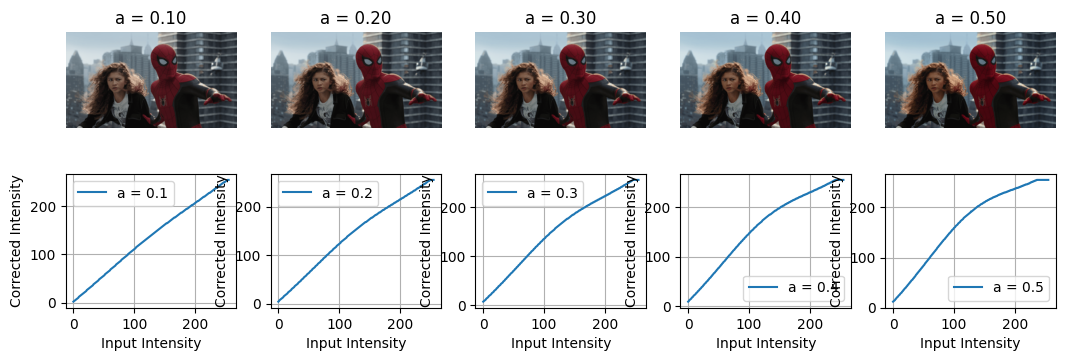

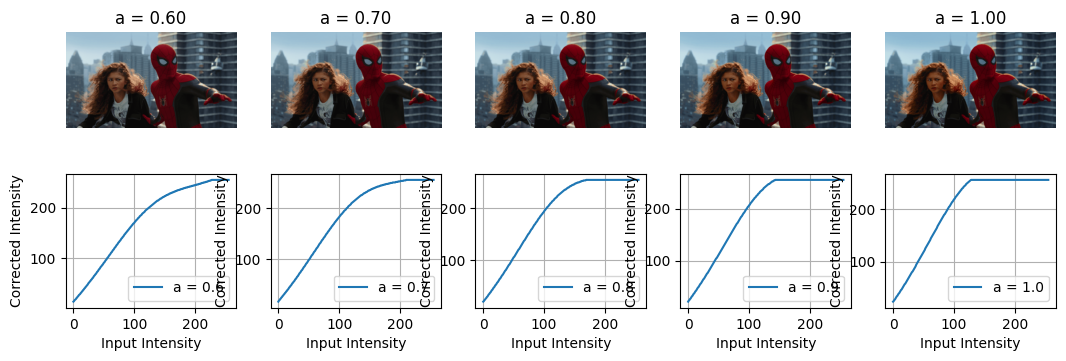

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

def vibrance(x, a):
    return int(min(x + a * 128 * np.exp(-(x - 128) ** 2 / (2 * 70 ** 2)), 255))

spider_image = cv.imread('spider.png', cv.IMREAD_COLOR)
spider_image_in_RGB = cv.cvtColor(spider_image, cv.COLOR_BGR2RGB)
spider_image_hsv = cv.cvtColor(spider_image, cv.COLOR_BGR2HSV)
h_channel, s_channel, v_channel = cv.split(spider_image_hsv)

a_values_row1 = [0.1, 0.2, 0.3, 0.4, 0.5]
a_values_row2 = [0.6, 0.7, 0.8, 0.9, 1.0]

plt.figure(figsize=(26, 8))

# Plot images with a=0.1 to a=0.5 in the first row
for i, a in enumerate(a_values_row1):
    table = np.array([vibrance(x, a) for x in np.arange(0, 256)]).astype('uint8')
    s_channel_corrected = cv.LUT(s_channel, table)
    spider_image_hsv_corrected = cv.merge((h_channel, s_channel_corrected, v_channel))
    spider_image_hsv_corrected_in_RGB = cv.cvtColor(spider_image_hsv_corrected, cv.COLOR_HSV2RGB)
    
    plt.subplot(4, 10, i + 1)
    plt.imshow(spider_image_hsv_corrected_in_RGB)
    plt.axis('off')
    plt.title('a = {:.2f}'.format(a))

# Plot vibrance functions for a=0.1 to a=0.5 in the second row
for i, a in enumerate(a_values_row1):
    table = np.array([vibrance(x, a) for x in np.arange(0, 256)]).astype('uint8')
    
    plt.subplot(4, 10, i + 11)
    plt.plot(np.arange(256), table, label=f'a = {a}')
    plt.xlabel('Input Intensity')
    plt.ylabel('Corrected Intensity')
    plt.legend()
    plt.grid()


plt.figure(figsize=(26, 8))

# Plot images with a=0.6 to a=1.0 in the third row
for i, a in enumerate(a_values_row2):
    table = np.array([vibrance(x, a) for x in np.arange(0, 256)]).astype('uint8')
    s_channel_corrected = cv.LUT(s_channel, table)
    spider_image_hsv_corrected = cv.merge((h_channel, s_channel_corrected, v_channel))
    spider_image_hsv_corrected_in_RGB = cv.cvtColor(spider_image_hsv_corrected, cv.COLOR_HSV2RGB)
    
    plt.subplot(4, 10, i + 21)
    plt.imshow(spider_image_hsv_corrected_in_RGB)
    plt.axis('off')
    plt.title('a = {:.2f}'.format(a))

# Plot vibrance functions for a=0.6 to a=1.0 in the fourth row
for i, a in enumerate(a_values_row2):
    table = np.array([vibrance(x, a) for x in np.arange(0, 256)]).astype('uint8')
    
    plt.subplot(4, 10, i + 31)
    plt.plot(np.arange(256), table, label=f'a = {a}')
    plt.xlabel('Input Intensity')
    plt.ylabel('Corrected Intensity')
    plt.legend()
    plt.grid()


plt.show()


**The best value for a seems to be around 0.7.**

# Question 5: Histogram Equalization

## Histogram Equalization using OpenCVs Inbuilt Function

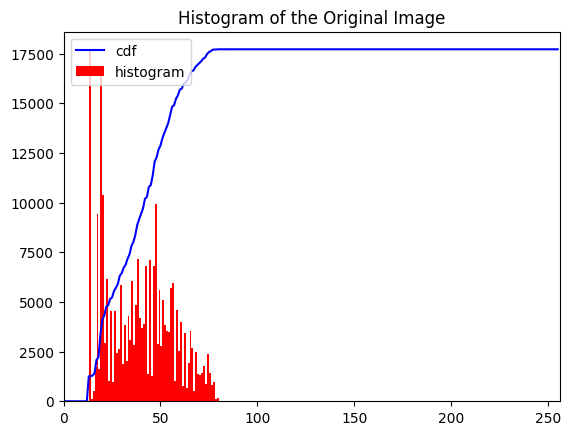

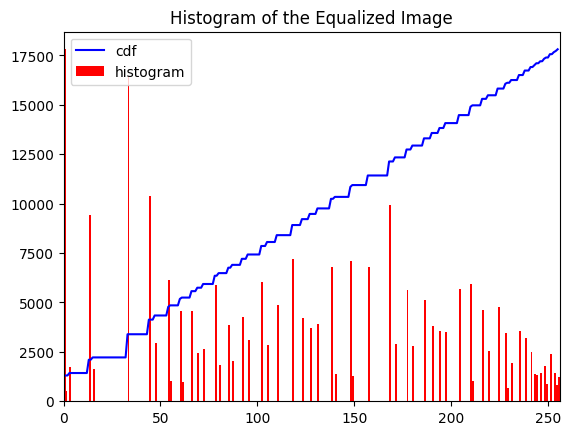

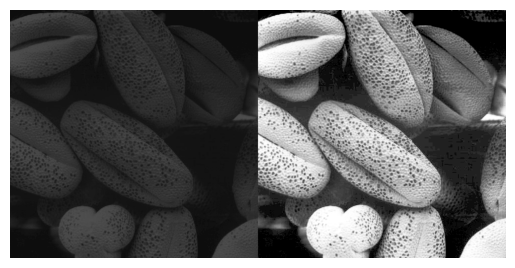

In [71]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('shells.tif', cv.IMREAD_GRAYSCALE)

hist, bins = np.histogram(img.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.title('Histogram of the Original Image')
plt.show()

equ = cv.equalizeHist(img)
hist, bins = np.histogram(equ.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
plt.plot(cdf_normalized, color='b')
plt.hist(equ.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.title('Histogram of the Equalized Image')
plt.show()

res = np.hstack((img, equ))
plt.axis('off')
plt.imshow(res, cmap='gray')


## Histogram Equalization using Custom Function

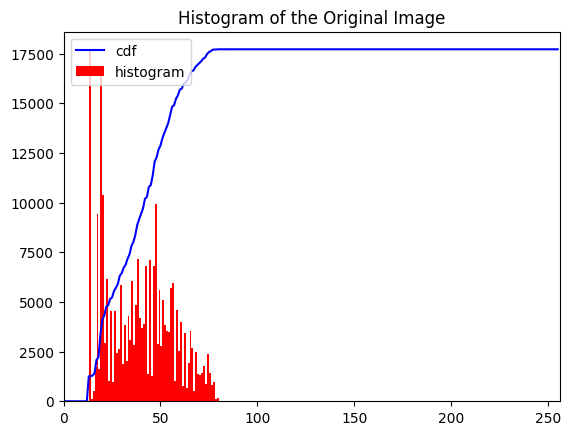

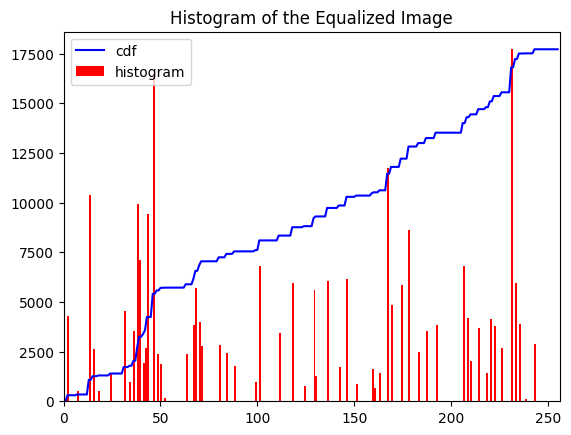

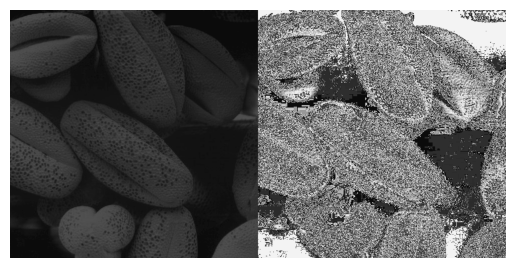

In [72]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


def custom_equalize_hist(image):

    # Calculate histogram and CDF. This is same as when using inbuilt function cv.equalizeHist()
    histogram, bins = np.histogram(image.flatten(), bins=256, range=(0, 256))
    cdf = histogram.cumsum()
    cdf_normalized = cdf * histogram.max() / cdf.max()

    # Instead of using inuilt function cv.equalizeHist(), we will use the CDF calculated above to get the equalized image
    # We will use linear interpolation (np.interp()) to get the new pixel values 
    lookup_table = np.interp(image.flatten(), bins[:-1], cdf_normalized) 

    # Reshape the equalized_image array into the same shape as the original image.
    equalized_image = lookup_table.reshape(image.shape).astype(np.uint8)
    return equalized_image



img = cv.imread('shells.tif', cv.IMREAD_GRAYSCALE)

hist, bins = np.histogram(img.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.title('Histogram of the Original Image')
plt.show()

equ = custom_equalize_hist(img)
hist, bins = np.histogram(equ.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
plt.plot(cdf_normalized, color='b')
plt.hist(equ.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.title('Histogram of the Equalized Image')
plt.show()

res = np.hstack((img, equ))
plt.axis('off')
plt.imshow(res, cmap='gray')
plt.show()


- We can clearly observe that the output image we obtained using the custom function is not as good as when we used the inbuilt function. 

- This is because the inbuilt function uses a more sophisticated algorithm to perform histogram equalization.

# Question 6: Histogram Equalization of Foreground

## Part (a): Open the image in Fig. 6, split it into hue, saturation, and values and display these planes in grayscale.

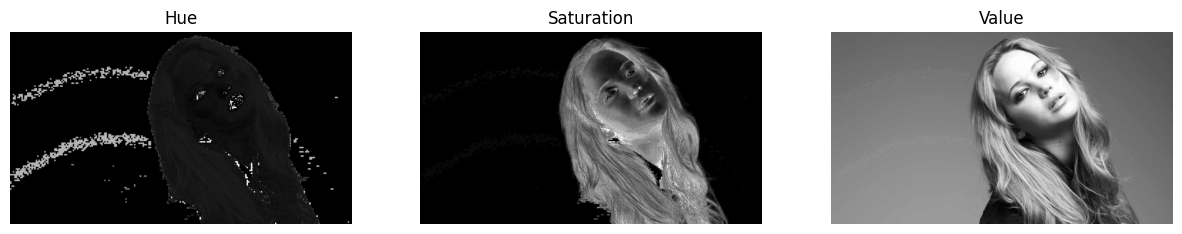

In [73]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


image = cv.imread('jeniffer.jpg', cv.IMREAD_COLOR)      # Open CV will read image in BGR format


hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)        # Convert the image to HSV color space


hue, saturation, value = cv.split(hsv_image)            # Split the HSV image into hue, saturation, and value planes


plt.figure(figsize=(15, 10))
plt.subplot(131), plt.imshow(hue, cmap='gray'), plt.title('Hue')
plt.axis('off')
plt.subplot(132), plt.imshow(saturation, cmap='gray'), plt.title('Saturation')
plt.axis('off')
plt.subplot(133), plt.imshow(value, cmap='gray'), plt.title('Value')
plt.axis('off')
plt.show()


## Part (b): Select the appropriate plane to threshold in extract the foreground mask. A mask is a binary image.

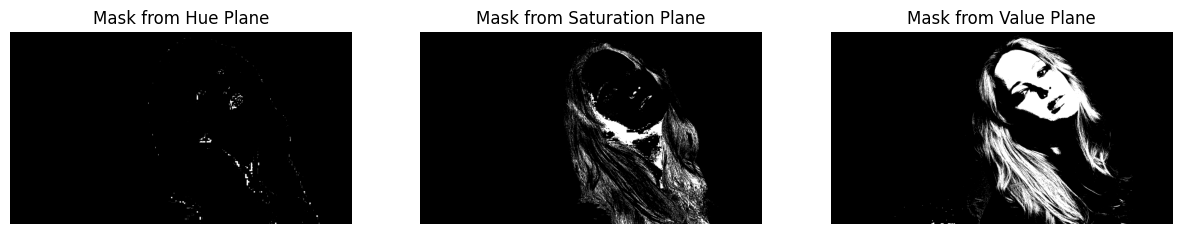

In [74]:
threshold = 154 
# This threshold value was selected based on trial and error to get the best possible mask from value plane

_,mask_1 = cv.threshold(hue, threshold, 255, cv.THRESH_BINARY)          # Thresholding the hue plane
_,mask_2 = cv.threshold(saturation, threshold, 255, cv.THRESH_BINARY)   # Thresholding the saturation plane
_,mask_3 = cv.threshold(value, threshold, 255, cv.THRESH_BINARY)        # Thresholding the value plane


plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(mask_1, cmap='gray')
plt.title('Mask from Hue Plane')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(mask_2, cmap='gray')
plt.title('Mask from Saturation Plane')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(mask_3, cmap='gray')
plt.title('Mask from Value Plane')
plt.axis('off')
plt.show()


## Part (c): Now obtain the foreground only using cv.bitwise_and and compute the histogram.

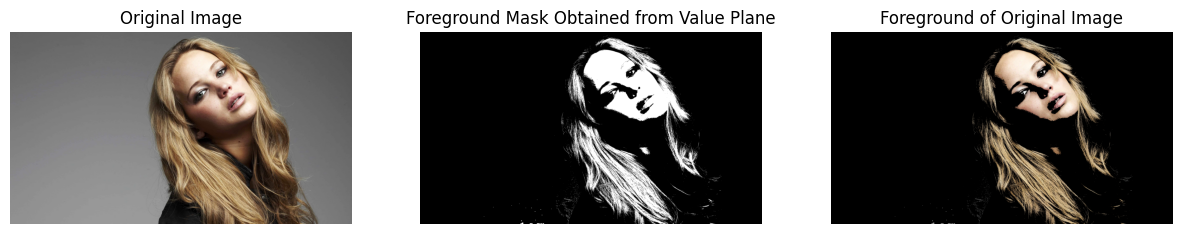

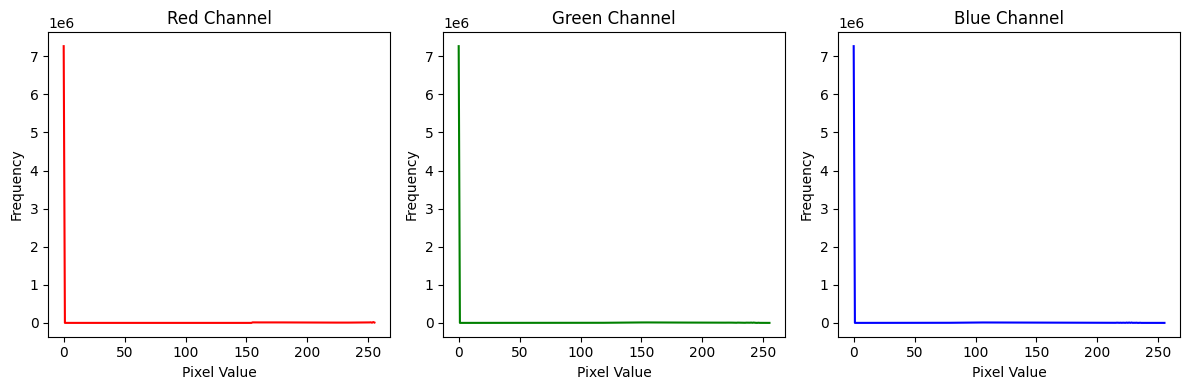

In [75]:
selected_mask = mask_3   # Select the mask obtained from value plane

foreground = cv.bitwise_and(image, image, mask=selected_mask)

plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(mask_3, cmap='gray')
plt.title('Foreground Mask Obtained from Value Plane')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Foreground of Original Image')
plt.axis('off')
plt.show()

hist_b = cv.calcHist([foreground], [0], None, [256], [0, 256])
hist_g = cv.calcHist([foreground], [1], None, [256], [0, 256])
hist_r = cv.calcHist([foreground], [2], None, [256], [0, 256])


plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(hist_r, color='red')
plt.title('Red Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.subplot(132)
plt.plot(hist_g, color='green')
plt.title('Green Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.subplot(133)
plt.plot(hist_b, color='blue')
plt.title('Blue Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Part (d): Obtain the cumulative sum of the histogram using np.cumsum.

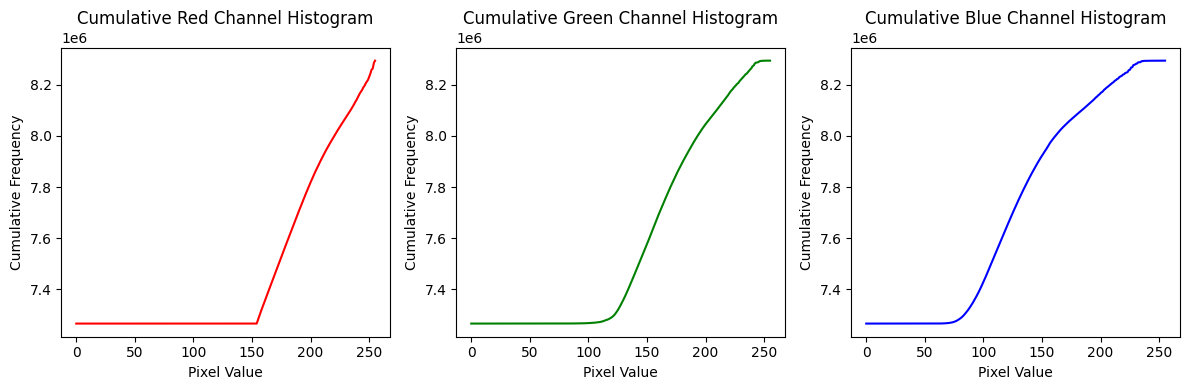

In [76]:
cumulative_hist_r = np.cumsum(hist_r)
cumulative_hist_g = np.cumsum(hist_g)
cumulative_hist_b = np.cumsum(hist_b)

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(cumulative_hist_r, color='red')
plt.title('Cumulative Red Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Frequency')
plt.subplot(132)
plt.plot(cumulative_hist_g, color='green')
plt.title('Cumulative Green Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Frequency')
plt.subplot(133)
plt.plot(cumulative_hist_b, color='blue')
plt.title('Cumulative Blue Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Frequency')
plt.tight_layout()
plt.show()


## Part (e): Use the formulas in slides to histogram-equalize the foreground.

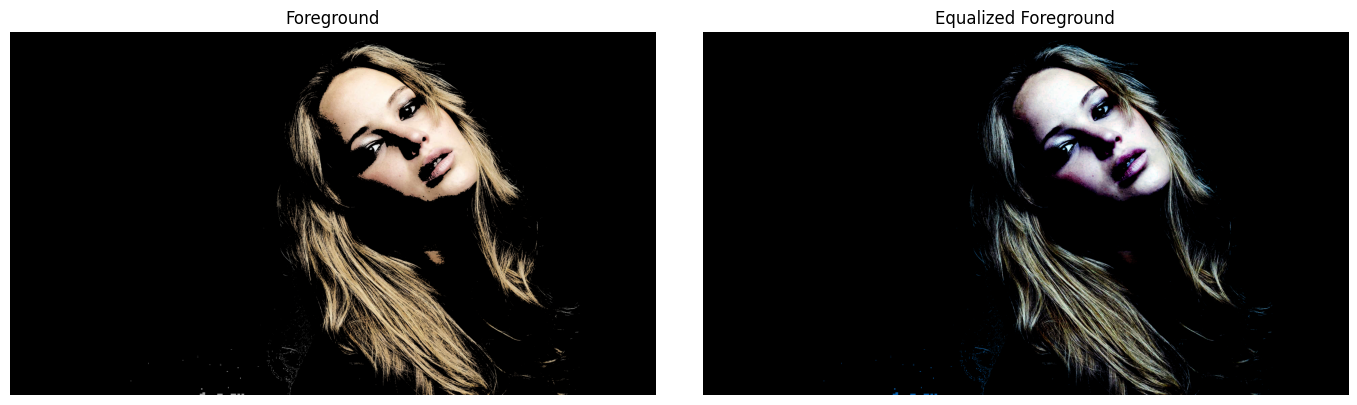

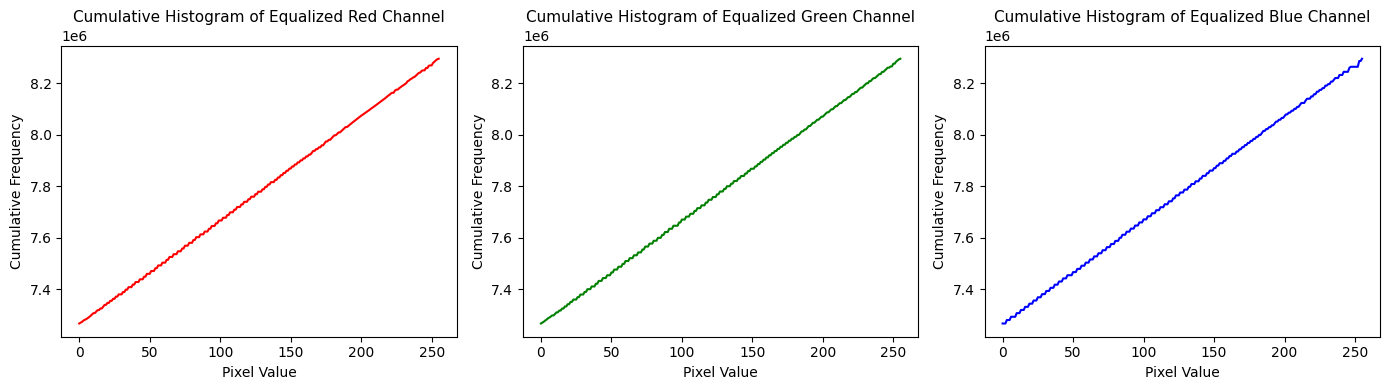

In [77]:
# Histogram equalization for each color channel
equalized_r = cv.equalizeHist(foreground[:, :, 0])
equalized_g = cv.equalizeHist(foreground[:, :, 1])
equalized_b = cv.equalizeHist(foreground[:, :, 2])

# Merge the equalized channels back into an equalized image
equalized_image = cv.merge((equalized_r, equalized_g, equalized_b))

# Calculate histograms for the equalized channels
equalized_hist_r = cv.calcHist([equalized_image], [0], None, [256], [0, 256])
equalized_hist_g = cv.calcHist([equalized_image], [1], None, [256], [0, 256])
equalized_hist_b = cv.calcHist([equalized_image], [2], None, [256], [0, 256])

# Create cumulative histograms for the equalized channels
cumulative_equalized_hist_r = np.cumsum(equalized_hist_r)
cumulative_equalized_hist_g = np.cumsum(equalized_hist_g)
cumulative_equalized_hist_b = np.cumsum(equalized_hist_b)


plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Foreground')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(equalized_image, cv.COLOR_BGR2RGB))
plt.title('Equalized Foreground')
plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 4))
plt.subplot(131)
plt.plot(cumulative_equalized_hist_r, color='red')
plt.title('Cumulative Histogram of Equalized Red Channel',fontsize=11)
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Frequency')
plt.subplot(132)
plt.plot(cumulative_equalized_hist_g, color='green')
plt.title('Cumulative Histogram of Equalized Green Channel',fontsize=11)
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Frequency')
plt.subplot(133)
plt.plot(cumulative_equalized_hist_b, color='blue')
plt.title('Cumulative Histogram of Equalized Blue Channel',fontsize=11)
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Frequency')
plt.tight_layout()
plt.show()


## Part (f): Extract the background and add with the histogram equalized foreground.

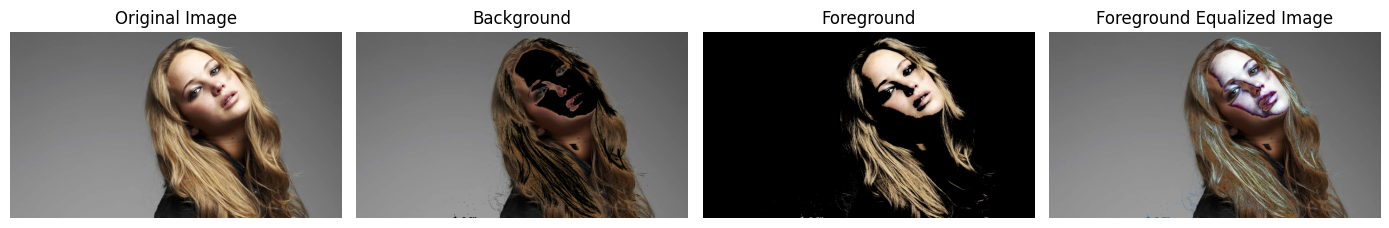

In [78]:
background = cv.bitwise_and(image, image, mask=cv.bitwise_not(selected_mask)) 
hist_equalized_image = cv.add(background, equalized_image)

plt.figure(figsize=(14, 4))
plt.subplot(1, 4, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
plt.title('Background')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Foreground')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(cv.cvtColor(hist_equalized_image, cv.COLOR_BGR2RGB))
plt.title('Foreground Equalized Image')
plt.axis('off')
plt.tight_layout()
plt.show()


## Display all the images

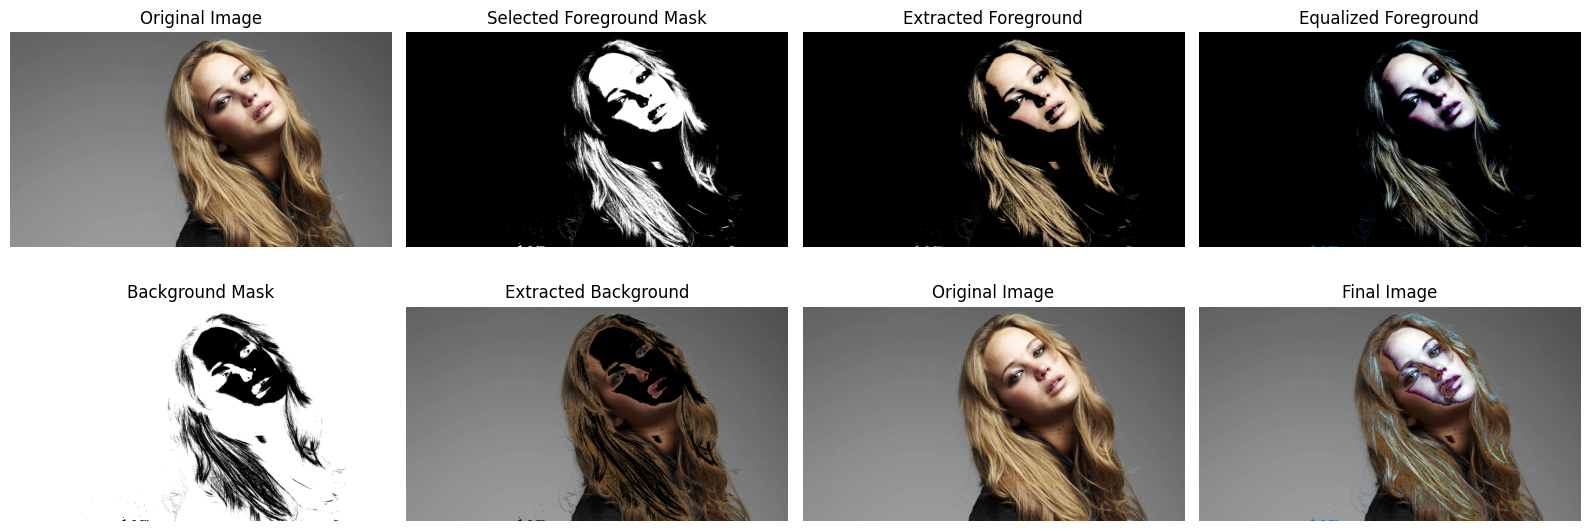

In [79]:
background_mask = cv.bitwise_not(selected_mask)

background = cv.bitwise_and(image, image, mask=background_mask)

final_image = cv.addWeighted(equalized_image, 1, background, 1, 0)


plt.figure(figsize=(16, 6))

plt.subplot(2, 4, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(selected_mask, cmap='gray')
plt.title('Selected Foreground Mask')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Extracted Foreground')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(cv.cvtColor(equalized_image, cv.COLOR_BGR2RGB))
plt.title('Equalized Foreground')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(background_mask, cmap='gray')
plt.title('Background Mask')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
plt.title('Extracted Background')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(cv.cvtColor(final_image, cv.COLOR_BGR2RGB))
plt.title('Final Image')
plt.axis('off')

plt.tight_layout()
plt.show()


# Queston 7: Sobel Filtering

We will be using the following Sorbel Horizontal Kernel for sorbel filtering,

\begin{matrix}
1 & 0 & -1 \\
2 & 0 & -2 \\
1 & 0 & -1 \\
\end{matrix} 

Since, this is a sorbel horizontal kernel, it will detect vertical edges.

## Part A: Using the existing filter2D to Sobel filter the image

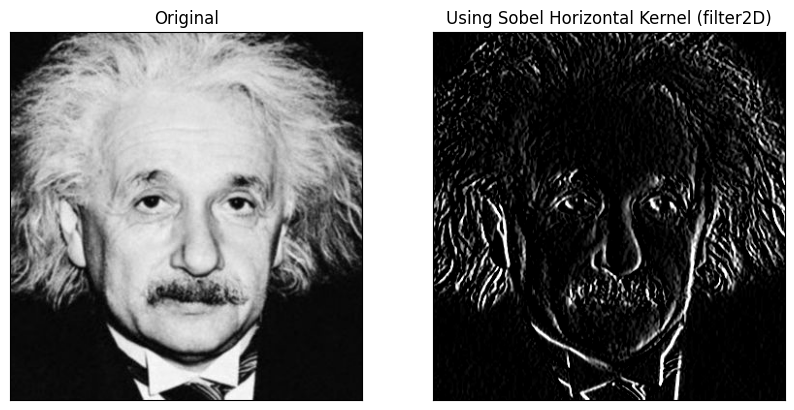

In [80]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


A_image  = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)

A_kernel = np.array([(1, 0, -1), (2, 0, -2), (1, 0, -1)], dtype='float')  

# Using the existing filter2D to Sobel filter the image
A_imgc   = cv.filter2D(A_image,-1,A_kernel)            

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(10,10))
axes[0].imshow(A_image, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(A_imgc, cmap='gray')
axes[1].set_title('Using Sobel Horizontal Kernel (filter2D)')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()


## Part B: Using own code to Sobel filter the image

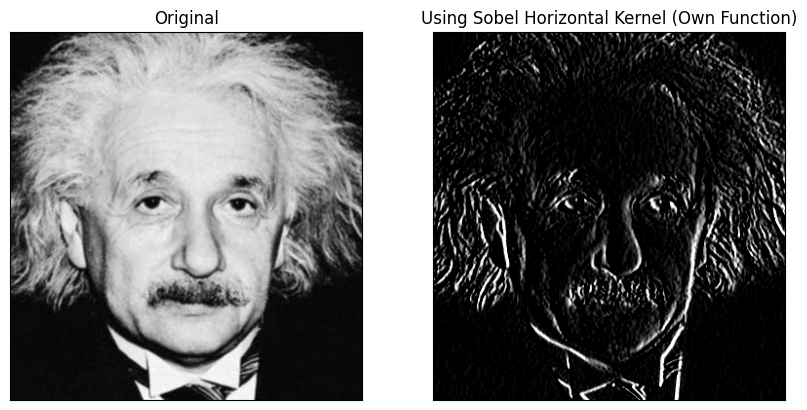

In [81]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


# Define the convolution function
def B_Convolution(image, kernel):

    kernel_size = kernel.shape[0]
    image_height, image_width = image.shape
    output_img = np.zeros((image_height - kernel_size + 1, image_width - kernel_size + 1))

    for i in range(output_img.shape[0]):
        for j in range(output_img.shape[1]):
            output_img[i, j] = np.sum(image[i:i+kernel_size, j:j+kernel_size] * kernel)

            # Apply pixel value mapping to achieve black and white appearance
            if output_img[i, j] < 0:       # If pixel value is less than 0, make it 0
                output_img[i, j] = 0
            elif output_img[i, j] > 255:   # If pixel value is greater than 255, make it 255
                output_img[i, j] = 255

    return output_img.astype(np.uint8)     # Return the output image as uint8 type


B_image = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)
B_kernel = np.array([(1, 0, -1), (2, 0, -2), (1, 0, -1)], dtype='float')
B_imgc = B_Convolution(B_image, B_kernel)

fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(10, 10))
axes[0].imshow(B_image, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(B_imgc, cmap='gray')
axes[1].set_title('Using Sobel Horizontal Kernel (Own Function)')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()


## Part C: Using the Property of Convolution to Carry out the Sobel Filtering

\begin{bmatrix}
1 & 0 & -1 \\
2 & 0 & -2 \\
1 & 0 & -1 \\
\end{bmatrix}  = \begin{bmatrix}   1 \\ 2 \\ 1\\ \end{bmatrix} * \begin{bmatrix} 1 & 0 & -1 \\ \end{bmatrix}


Instead of convolving the image with the kernel, we can convolve the image with the column vector and then convolve that result with the row vector. 

This is because convolution is associative,

<pre><b> image*(column*row) = (image*column)*row </b></pre>


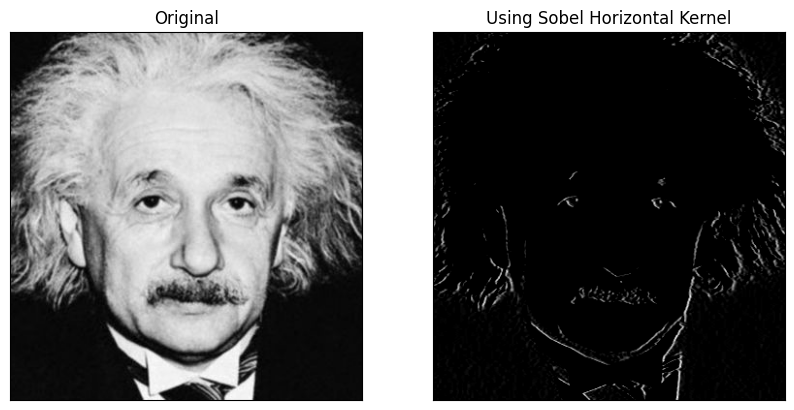

In [82]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


C_image = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)


C_column_kernel = np.array([([1],[2],[1])], dtype='float') 
C_row_kernel    = np.array([(1, 0, -1)], dtype='float')

C_imagec_1 = cv.filter2D(C_image   ,-1,C_column_kernel)    # Apply the column kernel first
C_imagec_2 = cv.filter2D(C_imagec_1,-1,C_row_kernel   )    # Apply the row kernel next

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(10,10))
axes[0].imshow(C_image, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(C_imagec_2, cmap='gray')
axes[1].set_title('Using Sobel Horizontal Kernel')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()


# Question 8: Zooming

## Zooming Image of Margot Robbie (IM11)

### Nearest Neighbour 

Zooming the small image using Nearest Neighbour method
Zooming Factor : 3
Shape of original image : (167, 250, 3)
Shape of new image : (500, 750, 3)


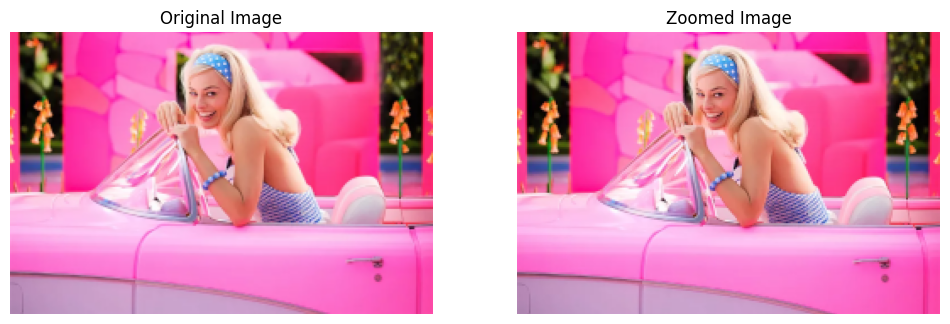

SSD Between Original and Zoomed Image : 24222698


In [83]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

original_image = cv.imread('./zooming/im11small.png', cv.IMREAD_COLOR)   # Open CV will read image in BGR format
original_image_in_RGB = cv.cvtColor(original_image, cv.COLOR_BGR2RGB)    # Convert BGR to RGB if we need to display using matplotlib



def SSD(image1, image2):
    return np.sum((image1-image2)**2)


def zoom_image(original_image,zooming_factor):

    height, width, channels = original_image.shape

    new_height = int(height * zooming_factor) - 1
    new_width  = int(width  * zooming_factor)

    new_image  = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    print("Shape of original image :",original_image.shape)
    print("Shape of new image :",new_image.shape)

    for i in range(new_height):
        for j in range(new_width):
            new_image[i,j] = original_image[int(i/zooming_factor), int(j/zooming_factor)]

    new_image_in_RGB = cv.cvtColor(new_image, cv.COLOR_BGR2RGB)         # Convert BGR to RGB if we need to display using matplotlib          

    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(original_image_in_RGB)
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(new_image_in_RGB)
    plt.title('Zoomed Image')
    plt.axis('off')
    plt.show()

    cv.imwrite('./zooming/im11small'+'_Zoomed_using_Nearest_neighbour_method.png', new_image)

    original_image_BIG = cv.imread('./zooming/im11.png', cv.IMREAD_COLOR)
    print("SSD Between Original and Zoomed Image :",SSD(original_image_BIG, new_image))



print("Zooming the small image using Nearest Neighbour method")
zooming_factor = 3
print("Zooming Factor :",zooming_factor)
zoom_image(original_image,zooming_factor)


### Bilinear Interpolation

Zooming the small image using Bilinear Interpolation
Zooming Factor : 3
Shape of original image : (167, 250, 3)
Shape of new image : (500, 750, 3)


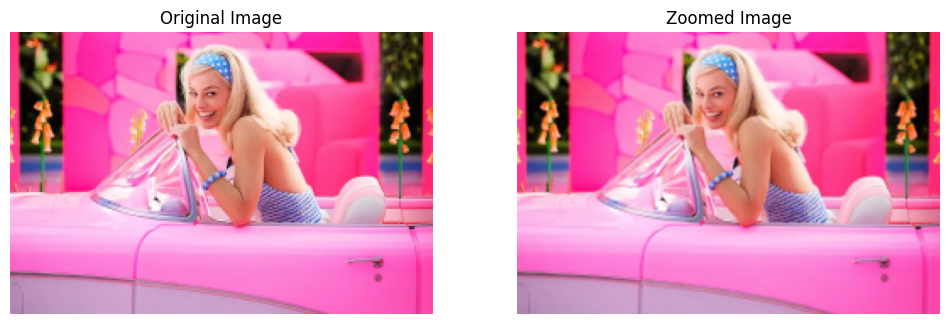

SSD Between Original and Zoomed Image : 26825387


In [84]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

original_image = cv.imread('./zooming/im11small.png', cv.IMREAD_COLOR)   # Open CV will read image in BGR format
original_image_in_RGB = cv.cvtColor(original_image, cv.COLOR_BGR2RGB)    # Convert BGR to RGB if we need to display using matplotlib


def SSD(image1, image2):
    return np.sum((image1-image2)**2)


def zoom_image_INTERPOLATION(original_image,zooming_factor):

    height, width, channels = original_image.shape

    new_height = int(height * zooming_factor) - 1
    new_width  = int(width  * zooming_factor) 

    new_image  = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    print("Shape of original image :",original_image.shape)
    print("Shape of new image :",new_image.shape)

    for i in range(new_height):
        for j in range(new_width):

            y_original=i/zooming_factor
            x_original=j/zooming_factor

            y_floor=int(np.floor(y_original))
            x_floor=int(np.floor(x_original))
            y_ceil =int(np.ceil(y_original))
            x_ceil =int(np.ceil(x_original))

            top_left_pixel     = original_image[min(y_floor, height - 1), min(x_floor, width - 1)] 
            top_right_pixel    = original_image[min(y_floor, height - 1), min(x_ceil , width - 1)]
            bottom_left_pixel  = original_image[min(y_ceil , height - 1), min(x_floor, width - 1)]
            bottom_right_pixel = original_image[min(y_ceil , height - 1), min(x_ceil , width - 1)]

            y_fraction_from_top  = y_original - y_floor
            x_fraction_from_left = x_original - x_floor

            new_pixel = (
                top_left_pixel     * (1-x_fraction_from_left) * (1-y_fraction_from_top) +
                top_right_pixel    * (x_fraction_from_left)   * (1-y_fraction_from_top) +
                bottom_left_pixel  * (1-x_fraction_from_left) * (y_fraction_from_top)   +
                bottom_right_pixel * (x_fraction_from_left)   * (y_fraction_from_top)
                        )

            new_image[i, j] = new_pixel.astype(np.uint8)

    new_image_in_RGB = cv.cvtColor(new_image, cv.COLOR_BGR2RGB)         # Convert BGR to RGB if we need to display using matplotlib          

    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(original_image_in_RGB)
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(new_image_in_RGB)
    plt.title('Zoomed Image')
    plt.axis('off')
    plt.show()

    cv.imwrite('./zooming/im11small'+'_Zoomed_using_Bilinear_Interpolation.png', new_image)

    original_image_BIG = cv.imread('./zooming/im11.png', cv.IMREAD_COLOR)
    print("SSD Between Original and Zoomed Image :",SSD(original_image_BIG, new_image))



print("Zooming the small image using Bilinear Interpolation")
zooming_factor = 3
print("Zooming Factor :",zooming_factor)
zoom_image_INTERPOLATION(original_image,zooming_factor)


## Zooming Image of Lord of the Rings (IM01)

### Nearest Neighbour 

Zooming the small image using Nearest Neighbour method
Zooming Factor : 4
Shape of original image : (270, 480, 3)
Shape of new image : (1080, 1920, 3)


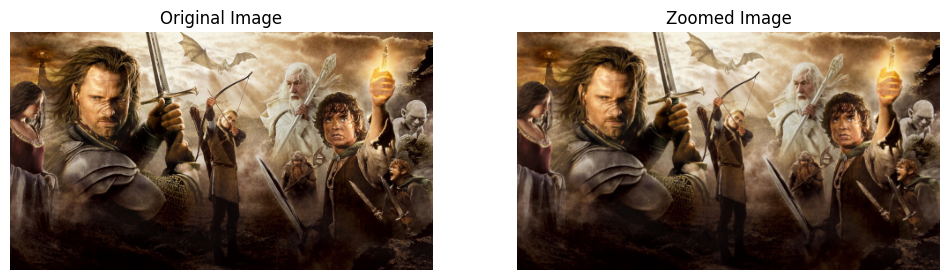

SSD Between Original and Zoomed Image : 194613476


In [85]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

original_image = cv.imread('./zooming/im01small.png', cv.IMREAD_COLOR)   # Open CV will read image in BGR format
original_image_in_RGB = cv.cvtColor(original_image, cv.COLOR_BGR2RGB)    # Convert BGR to RGB if we need to display using matplotlib



def SSD(image1, image2):
    return np.sum((image1-image2)**2)


def zoom_image(original_image,zooming_factor):

    height, width, channels = original_image.shape

    new_height = int(height * zooming_factor) 
    new_width  = int(width  * zooming_factor)

    new_image  = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    print("Shape of original image :",original_image.shape)
    print("Shape of new image :",new_image.shape)

    for i in range(new_height):
        for j in range(new_width):
            new_image[i,j] = original_image[int(i/zooming_factor), int(j/zooming_factor)]

    new_image_in_RGB = cv.cvtColor(new_image, cv.COLOR_BGR2RGB)         # Convert BGR to RGB if we need to display using matplotlib          

    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(original_image_in_RGB)
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(new_image_in_RGB)
    plt.title('Zoomed Image')
    plt.axis('off')
    plt.show()

    cv.imwrite('./zooming/im01small'+'_Zoomed_using_Nearest_neighbour_method.png', new_image)

    original_image_BIG = cv.imread('./zooming/im01.png', cv.IMREAD_COLOR)
    print("SSD Between Original and Zoomed Image :",SSD(original_image_BIG, new_image))



print("Zooming the small image using Nearest Neighbour method")
zooming_factor = 4
print("Zooming Factor :",zooming_factor)
zoom_image(original_image,zooming_factor)


### Bilinear Interpolation

Zooming the small image using Bilinear Interpolation
Zooming Factor : 4
Shape of original image : (270, 480, 3)
Shape of new image : (1080, 1920, 3)


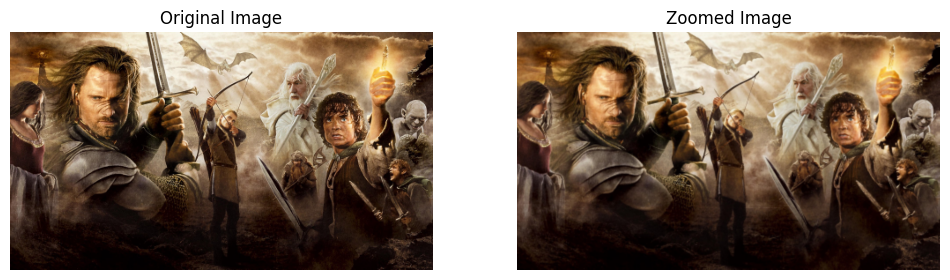

SSD Between Original and Zoomed Image : 244210152


In [86]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

original_image = cv.imread('./zooming/im01small.png', cv.IMREAD_COLOR)   # Open CV will read image in BGR format
original_image_in_RGB = cv.cvtColor(original_image, cv.COLOR_BGR2RGB)    # Convert BGR to RGB if we need to display using matplotlib


def SSD(image1, image2):
    return np.sum((image1-image2)**2)


def zoom_image_INTERPOLATION(original_image,zooming_factor):

    height, width, channels = original_image.shape

    new_height = int(height * zooming_factor) 
    new_width  = int(width  * zooming_factor) 

    new_image  = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    print("Shape of original image :",original_image.shape)
    print("Shape of new image :",new_image.shape)

    for i in range(new_height):
        for j in range(new_width):

            y_original=i/zooming_factor
            x_original=j/zooming_factor

            y_floor=int(np.floor(y_original))
            x_floor=int(np.floor(x_original))
            y_ceil =int(np.ceil(y_original))
            x_ceil =int(np.ceil(x_original))

            top_left_pixel     = original_image[min(y_floor, height - 1), min(x_floor, width - 1)] 
            top_right_pixel    = original_image[min(y_floor, height - 1), min(x_ceil , width - 1)]
            bottom_left_pixel  = original_image[min(y_ceil , height - 1), min(x_floor, width - 1)]
            bottom_right_pixel = original_image[min(y_ceil , height - 1), min(x_ceil , width - 1)]

            y_fraction_from_top  = y_original - y_floor
            x_fraction_from_left = x_original - x_floor

            new_pixel = (
                top_left_pixel     * (1-x_fraction_from_left) * (1-y_fraction_from_top) +
                top_right_pixel    * (x_fraction_from_left)   * (1-y_fraction_from_top) +
                bottom_left_pixel  * (1-x_fraction_from_left) * (y_fraction_from_top)   +
                bottom_right_pixel * (x_fraction_from_left)   * (y_fraction_from_top)
                        )

            new_image[i, j] = new_pixel.astype(np.uint8)

    new_image_in_RGB = cv.cvtColor(new_image, cv.COLOR_BGR2RGB)         # Convert BGR to RGB if we need to display using matplotlib          

    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(original_image_in_RGB)
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(new_image_in_RGB)
    plt.title('Zoomed Image')
    plt.axis('off')
    plt.show()

    cv.imwrite('./zooming/im01small'+'_Zoomed_using_Bilinear_Interpolation.png', new_image)

    original_image_BIG = cv.imread('./zooming/im01.png', cv.IMREAD_COLOR)
    print("SSD Between Original and Zoomed Image :",SSD(original_image_BIG, new_image))



print("Zooming the small image using Bilinear Interpolation")
zooming_factor = 4
print("Zooming Factor :",zooming_factor)
zoom_image_INTERPOLATION(original_image,zooming_factor)


# Question 9: Segmentation

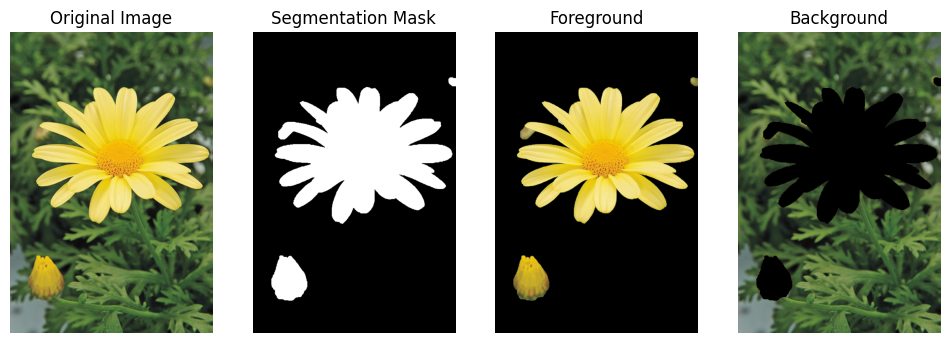

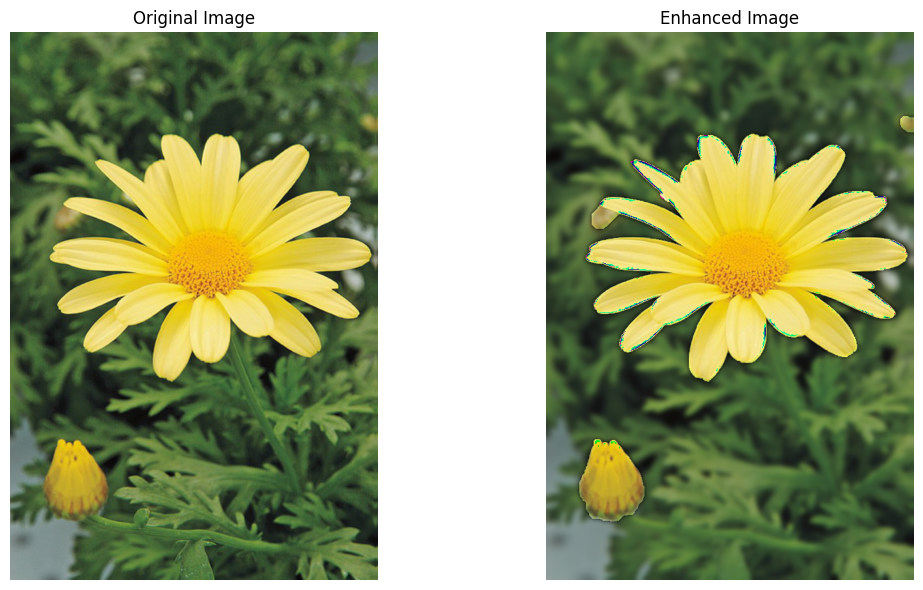

In [87]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('flower.png', cv.IMREAD_COLOR)    

# We create an initial mask, which is a black image of the same size as the input image. 
# This mask will be used to store information about the foreground and background regions.
mask = np.zeros(image.shape[:2], np.uint8)

# This line defines a rectangle that roughly encloses the flower in the image. 
# The rectangle coordinates are (x, y, width, height).
rect = (50, 50, image.shape[1]-50, image.shape[0]-50)

# These are matrices used by the GrabCut algorithm to internally store information about the 
# background and foreground models during the segmentation process.
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# The GrabCut algorithm is applied to the input image using the cv.grabCut() function.
cv.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

# This line converts the original mask (which contains multiple labels) into a binary mask 
# where foreground and probable foreground pixels are set to 1, and the rest (background 
# and probable background) are set to 0.
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# These lines use the binary mask to create segmented images: 
# a foreground image where the flower is isolated, and a background image where the flower is removed
foreground = image * mask2[:, :, np.newaxis]
background = image - foreground

# Here, we apply a Gaussian blur to the background image. 
# This blurs the background, making it more visually appealing as a backdrop for the flower.
blurred_background = cv.GaussianBlur(background, (21, 21), 0)

# We add the blurred background to the foreground image, 
# creating an enhanced image with the flower in focus and a blurred background.
enhanced_image = foreground + blurred_background



plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)), plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 4, 2), plt.imshow(mask2, cmap='gray'), plt.title('Segmentation Mask')
plt.axis('off')
plt.subplot(1, 4, 3), plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB)), plt.title('Foreground')
plt.axis('off')
plt.subplot(1, 4, 4), plt.imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB)), plt.title('Background')
plt.axis('off')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)), plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB)), plt.title('Enhanced Image')
plt.axis('off')

plt.tight_layout()
plt.show()



***Why is the background just beyond the edge of the flower quite dark in the enhanced image?***

- As we move from the flower's edge towards the background, the contrast between the flower and the background decreases. 
- The blurred background pixels get mixed with the pixels that represent the flower's edge, causing the transition zone between the flower and the background to become less distinct. 
- This reduced contrast contributes to the perception of a darker background.